**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

MATRICULA / NOMBRE

*  A00466615 Manuel Alejandro de Luis López
*  A01796049 Edgar Mendoza Martínez
*  A01796032 Francisco Javier Salgado Acevedo
*  A01795975 Diego Andrés Bernal Díaz

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Tec_Monterrey/Ciencia_analitica_datos/Entregables/Semana_8"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


1b) Búsqueda de valores faltantes.

In [6]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

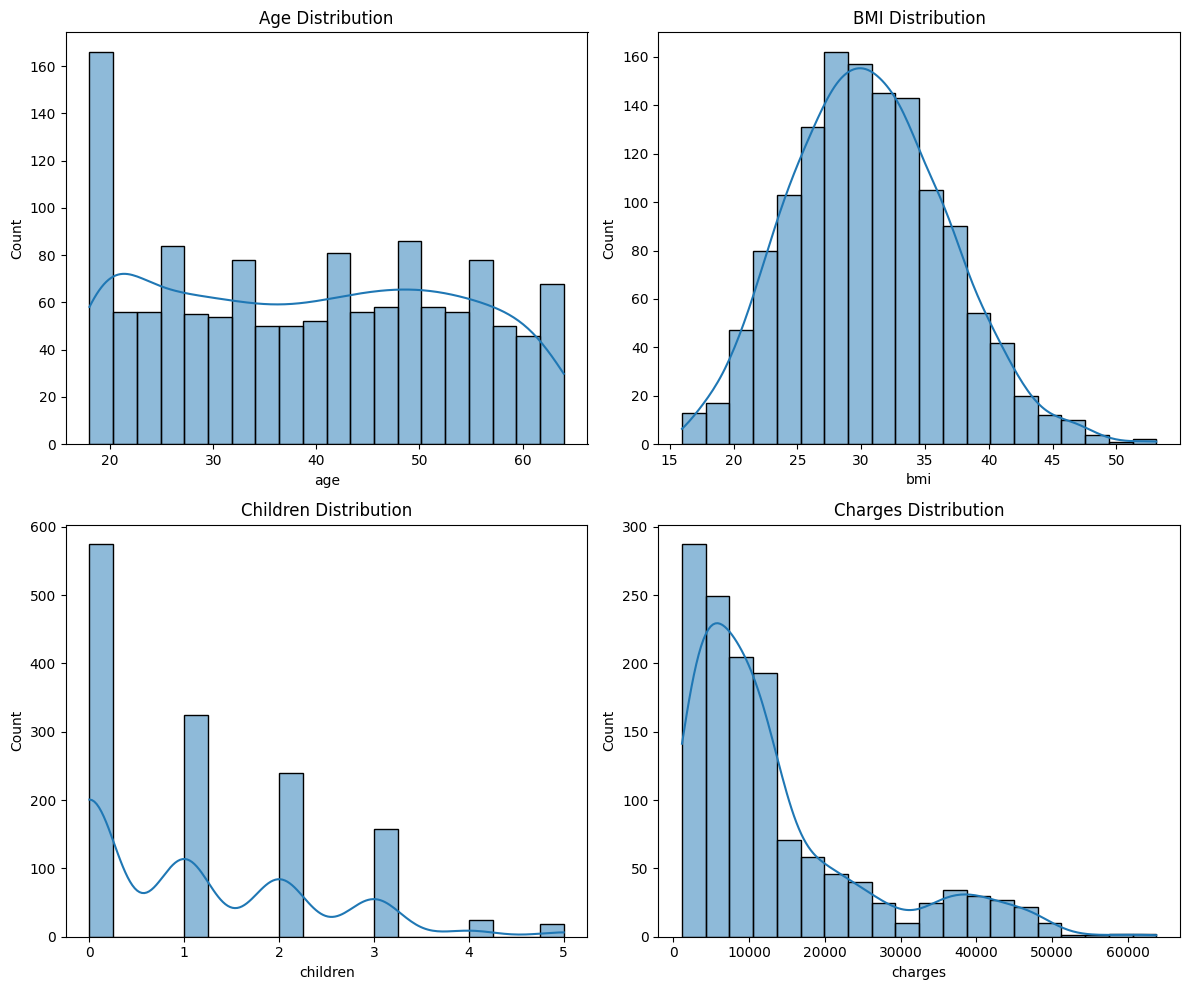

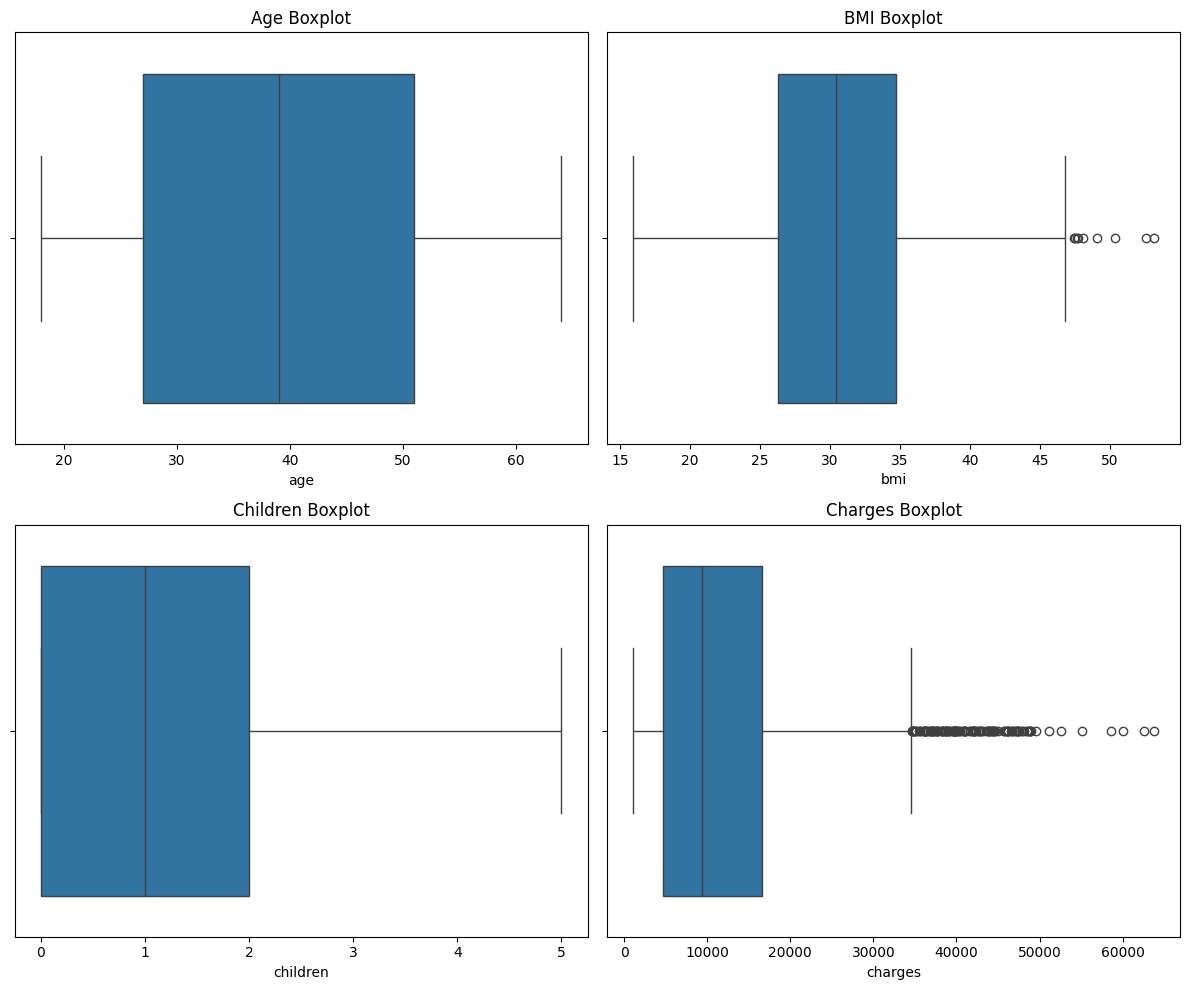

In [9]:
# Histograma para variables cuantitativas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(insurance_df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(insurance_df['bmi'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(insurance_df['children'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

sns.histplot(insurance_df['charges'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

# Boxplot para variables cuantitativas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x=insurance_df['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Boxplot')

sns.boxplot(x=insurance_df['bmi'], ax=axes[0, 1])
axes[0, 1].set_title('BMI Boxplot')

sns.boxplot(x=insurance_df['children'], ax=axes[1, 0])
axes[1, 0].set_title('Children Boxplot')

sns.boxplot(x=insurance_df['charges'], ax=axes[1, 1])
axes[1, 1].set_title('Charges Boxplot')

plt.tight_layout()
plt.show()

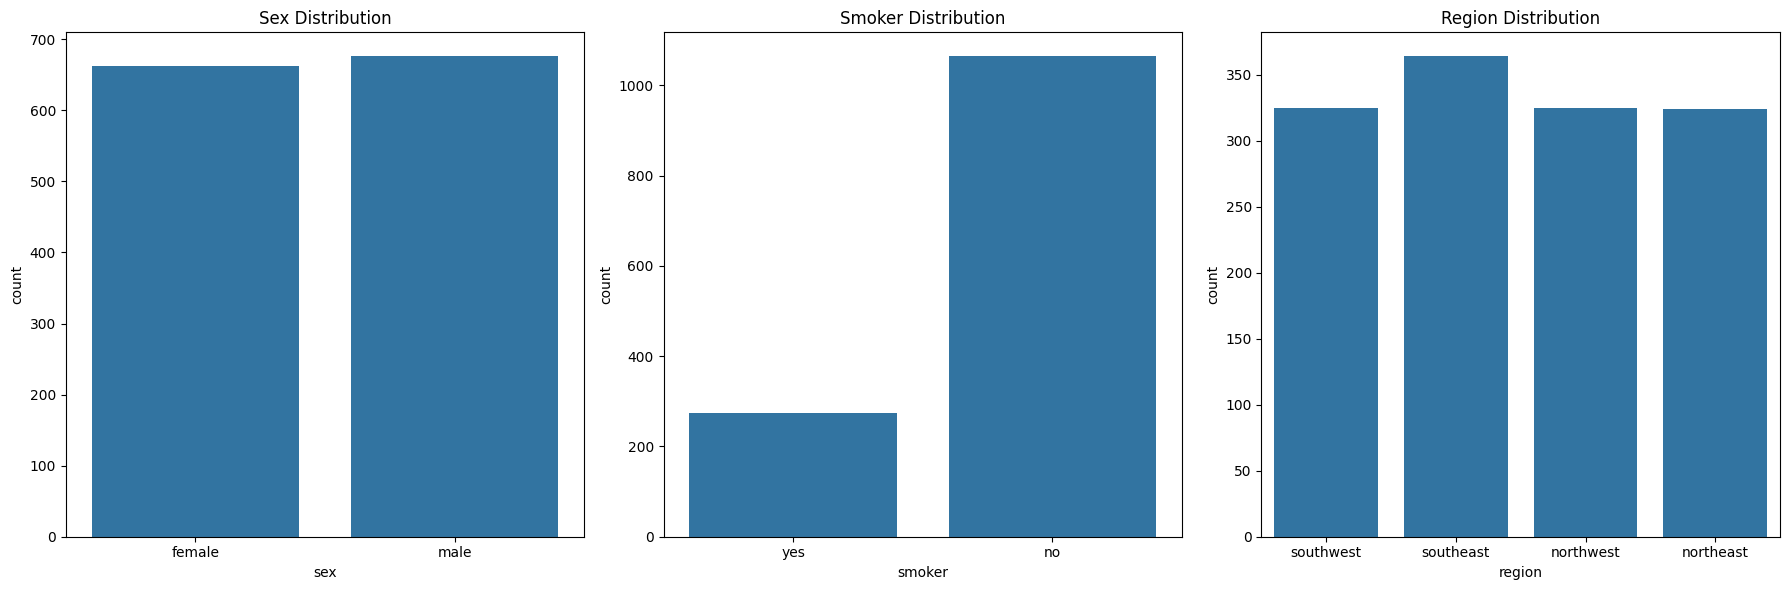

In [8]:
# Diagrama de barras para variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x=insurance_df['sex'], ax=axes[0])
axes[0].set_title('Sex Distribution')

sns.countplot(x=insurance_df['smoker'], ax=axes[1])
axes[1].set_title('Smoker Distribution')

sns.countplot(x=insurance_df['region'], ax=axes[2])
axes[2].set_title('Region Distribution')

plt.tight_layout()
plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.


Podemos observar que hay una ligera diferencia en las medianas de las primas de seguro entre hombres y mujeres, siendo las primas ligeramente más altas para los hombres. Sin embargo, la variabilidad y la presencia de valores atípicos son similares para ambos sexos.

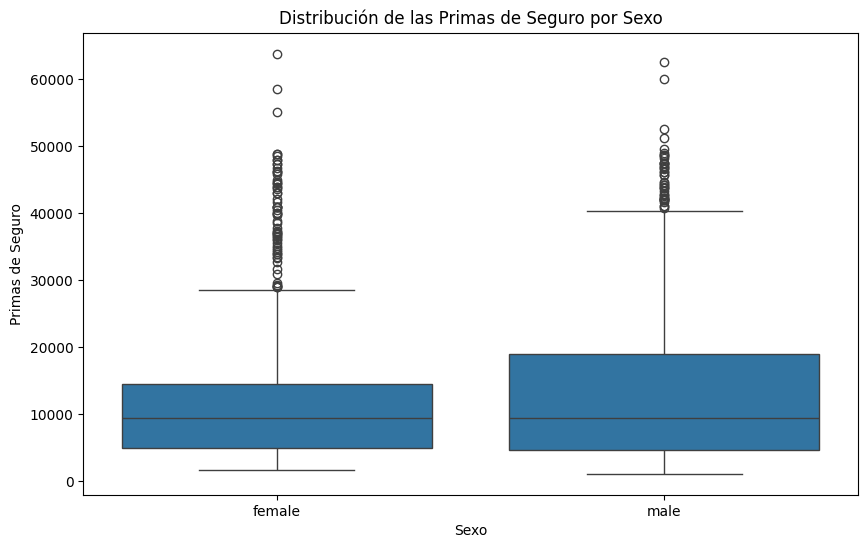

In [10]:
# Boxplot de charges segun el sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=insurance_df)
plt.title('Distribución de las Primas de Seguro por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Primas de Seguro')
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

* El factor más determinante en el aumento de las primas de seguro parece ser si la persona fuma o no. Los fumadores, independientemente de su BMI, enfrentan primas mucho más altas.
* El BMI también juega un papel importante, especialmente entre los fumadores, donde un BMI más alto está asociado con primas de seguro más altas.
* El número de hijos no muestra un patrón claro en la determinación de las primas de seguro en comparación con los factores de fumar y el BMI.

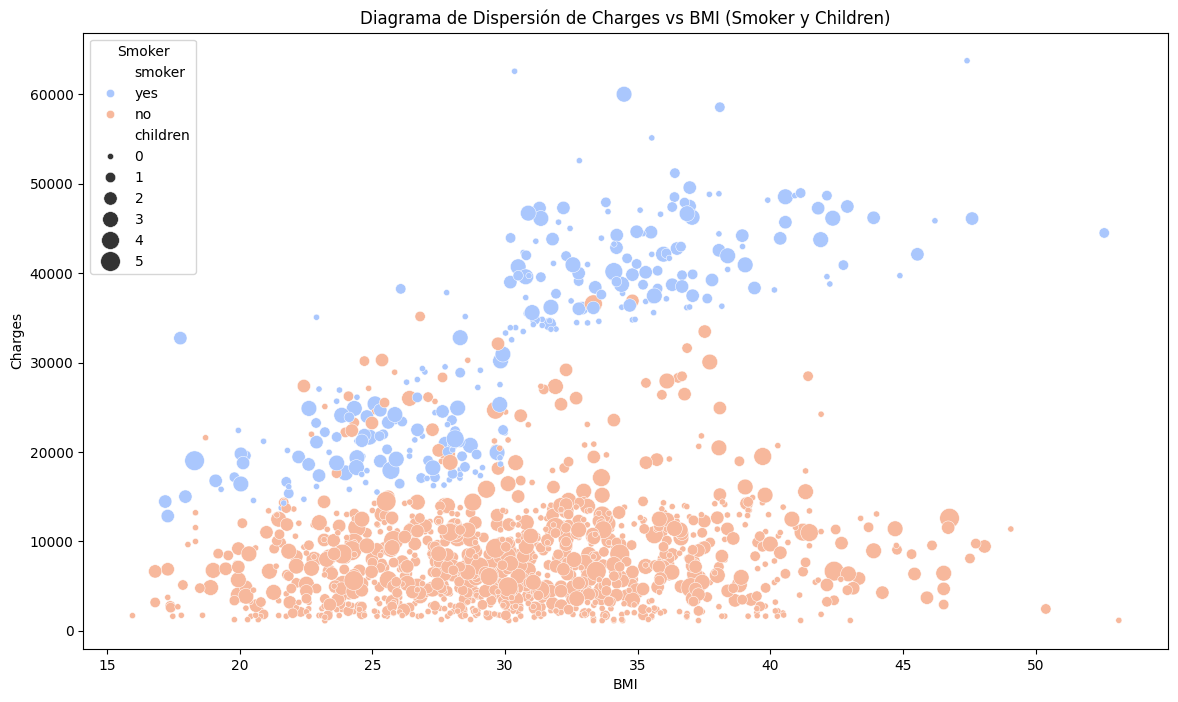

In [11]:
# Diagrama de dispersión
plt.figure(figsize=(14, 8))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', palette='coolwarm', sizes=(20, 200))
plt.title('Diagrama de Dispersión de Charges vs BMI (Smoker y Children)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

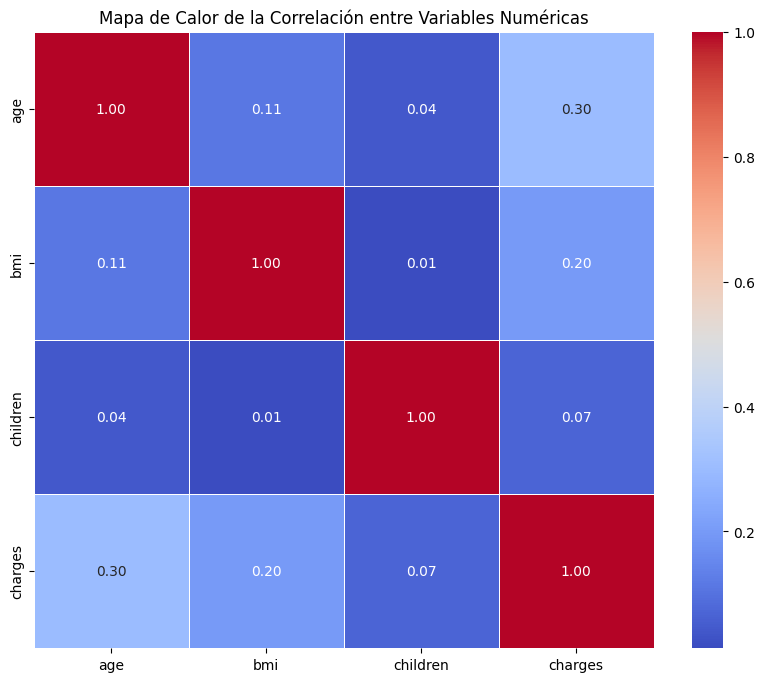

In [14]:
# Calcular la matriz y crear mapa
numeric_columns = insurance_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

El promedio de la edad en el DataFrame de valores atípicos es 41.08 años, y el promedio del bmi es 35.56. Esto indica que las personas con valores atípicos en las primas de seguro tienden a ser de mediana edad y tener un BMI relativamente alto.

In [18]:
# Calcular el IQR
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Observaciones que tienen valores atípicos
outliers_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]

# Mostrar el dataframe
outliers_df


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [17]:
# Calcular el promedio de age y bmi en valores atipicos
average_age_outliers = outliers_df['age'].mean()
average_bmi_outliers = outliers_df['bmi'].mean()

# Mostrar
average_age_outliers, average_bmi_outliers

(41.07913669064748, 35.564604316546756)

3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

* La mayoría de las observaciones con valores atípicos en las primas de seguro corresponden a hombres (64.03%) y a fumadores (97.84%). Esto sugiere que fumar es un factor significativo en la aparición de primas de seguro excepcionalmente altas.

In [19]:
# Calcular el porcentaje de mujeres y hombres en el df de valores atípicos
gender_counts = outliers_df['sex'].value_counts(normalize=True) * 100

# Mostrar
gender_counts

sex
male      64.028777
female    35.971223
Name: proportion, dtype: float64

In [20]:
# Calcular el porcentaje de fumadores y no fumadores en el df de valores atípicos
smoker_counts = outliers_df['smoker'].value_counts(normalize=True) * 100

# Mostrar
smoker_counts

smoker
yes    97.841727
no      2.158273
Name: proportion, dtype: float64

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [21]:
X = insurance_df.drop(columns=['charges'])
y = insurance_df['charges']

# Mostrar
X.head(), y.head()


(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [22]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=X['smoker'])

# Mostrar
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 6), (268, 6), (1070,), (268,))

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Numéricas y categóricas
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocesador
preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])



# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)


Análisis de Resultados:
RMSE: La RMSE de 5699.03 indica que las predicciones tienen un error de aproximadamente 5699 unidades charges.
Un valor de cuadrado de 0.7538 significa que el modelo explica aproximadamente el 75.38% de la variabilidad en las primas de seguro (charges). Esto sugiere que el modelo tiene un buen ajuste, pero no perfecto.
Estos resultados muestran que el modelo es relativamente fiable para predecir las primas de seguro


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline
lr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('regression', LinearRegression())
])

# Entrenar
lr_model.fit(X_train, y_train)

# Realizar predicciones en prueba
y_pred = lr_model.predict(X_test)

# Evaluar
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar
rmse, r2


(5699.034312583929, 0.7538310056936607)

**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


La RMSE de 4481.93 indica una mejora significativa en el error promedio de las predicciones.
Un valor de cuadrado de 0.7359, desmuestra que laa reducción del error cuadrático medio sugiere que el modelo es más robusto ante valores extremos.

Estos resultados muestran que reemplazar los outliers ha mejorado la precisión del modelo en términos de RMSE, aunque ha reducido ligeramente la varianza.


In [27]:
# Calcular el IQR para charges en entrenamiento
Q1_train = y_train.quantile(0.25)
Q3_train = y_train.quantile(0.75)
IQR_train = Q3_train - Q1_train
upper_bound_train = Q3_train + 1.5 * IQR_train

# Reemplazar los outliers en y_train
y_train_replaced = y_train.copy()
y_train_replaced[y_train > upper_bound_train] = upper_bound_train

# Calcular el IQR para charges en prueba
Q1_test = y_test.quantile(0.25)
Q3_test = y_test.quantile(0.75)
IQR_test = Q3_test - Q1_test
upper_bound_test = Q3_test + 1.5 * IQR_test

# Reemplazar los outliers en y_test
y_test_replaced = y_test.copy()
y_test_replaced[y_test > upper_bound_test] = upper_bound_test


In [28]:
# Pipeline nuevo
lr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('regression', LinearRegression())
])

# Entrenar
lr_model2.fit(X_train, y_train_replaced)

# Predicciones de prueba
y_pred_replaced = lr_model2.predict(X_test)

# Evaluar
rmse_replaced = np.sqrt(mean_squared_error(y_test_replaced, y_pred_replaced))
r2_replaced = r2_score(y_test_replaced, y_pred_replaced)

# Mostrar
rmse_replaced, r2_replaced


(4481.933238161504, 0.7349544601673614)

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.


La RMSE de 4479.05 es similar a la obtenida con el modelo 2, lo que indica que la precisión del modelo se mantiene casi igual.
Un valor de cuadrado de 0.7353 es también similar al del modelo 2, lo que sugiere que la variabilidad explicada por el modelo no ha cambiado significativamente.

Estos resultados muestran que el escalamiento estándar y la codificación ordinal no han cambiado sustancialmente el rendimiento del modelo.

In [29]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Definir los valores
sex_categories = ['female', 'male']
smoker_categories = ['no', 'yes']
region_categories = ['northeast', 'northwest', 'southeast', 'southwest']

# Preprocesador con StandardScaler, OrdinalEncoder
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(categories=[sex_categories, smoker_categories, region_categories]), categorical_features)
    ])


In [30]:
# Pipeline 3
lr_model3 = Pipeline(steps=[
    ('preprocessing2', preprocessing2),
    ('regression', LinearRegression())
])

# Entrenar
lr_model3.fit(X_train, y_train_replaced)

# Predicciones de prueba
y_pred_replaced2 = lr_model3.predict(X_test)

# Evaluar
rmse_replaced2 = np.sqrt(mean_squared_error(y_test_replaced, y_pred_replaced2))
r2_replaced2 = r2_score(y_test_replaced, y_pred_replaced2)

# Mostrar
rmse_replaced2, r2_replaced2


(4479.0529489849405, 0.73529501075536)



10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

Paso 1: Evaluar diferentes grados de regresión polinomial

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Preprocesamiento
def preprocess_data(X, y, preprocessing_pipeline):
    X_preprocessed = preprocessing_pipeline.fit_transform(X)
    return X_preprocessed, y

# Preprocesador
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(categories=[sex_categories, smoker_categories, region_categories]), categorical_features)
    ])

# Entrenamiento y prueba
X_train_preprocessed, y_train_preprocessed = preprocess_data(X_train, y_train_replaced, preprocessing2)
X_test_preprocessed, y_test_preprocessed = preprocess_data(X_test, y_test_replaced, preprocessing2)

# Diferentes grados
best_degree = 0
best_rmse = float('inf')
best_r2 = 0
results = []

for degree in range(1, 5):  # Probar con grados del 1 al 4
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Pipeline
    lr_model_poly = Pipeline(steps=[
        ('polynomial_features', polynomial_features),
        ('regression', LinearRegression())
    ])

    # Entrenar
    lr_model_poly.fit(X_train_preprocessed, y_train_preprocessed)

    # Predicciones
    y_pred_poly = lr_model_poly.predict(X_test_preprocessed)

    # Evaluar
    rmse_poly = np.sqrt(mean_squared_error(y_test_preprocessed, y_pred_poly))
    r2_poly = r2_score(y_test_preprocessed, y_pred_poly)

    results.append((degree, rmse_poly, r2_poly))

    # Seleccionar el mejor grado basado en RMSE
    if rmse_poly < best_rmse:
        best_degree = degree
        best_rmse = rmse_poly
        best_r2 = r2_poly

# Mostrar
results


[(1, 4473.566532925655, 0.7359430907252369),
 (2, 4199.577037155957, 0.7672976126127979),
 (3, 4348.092990612481, 0.7505477754128689),
 (4, 4666.438056177992, 0.7126833827225392)]

Paso 2: Entrenar y guardar el mejor modelo polinomial


In [33]:
# Pipeline
polynomial_features_best = PolynomialFeatures(degree=best_degree, include_bias=False)
lr_model4 = Pipeline(steps=[
    ('polynomial_features', polynomial_features_best),
    ('regression', LinearRegression())
])

# Entrenar el mejor
lr_model4.fit(X_train_preprocessed, y_train_preprocessed)

# Predicciones
y_pred_best = lr_model4.predict(X_test_preprocessed)

# Evaluar
rmse_best = np.sqrt(mean_squared_error(y_test_preprocessed, y_pred_best))
r2_best = r2_score(y_test_preprocessed, y_pred_best)

# Mostrar el mejor modelo
best_degree, rmse_best, r2_best


(2, 4199.577037155957, 0.7672976126127979)

Análisis de Resultados:
La RMSE de 4199.58 es la más baja obtenida hasta ahora, lo que indica una mejora significativa en la precisión del modelo.
Un valor de cuadrado de 0.7673 sugiere que el modelo explica aproximadamente el 76.73% de la variabilidad en charges, lo cual es un ajuste mejor que los modelos lineales previos.

Estos resultados muestran que el modelo de regresión polinomial de grado 2 proporciona un mejor ajuste en comparación con los modelos de regresión lineal simples.